In [1]:
!apt-get install -y ghostscript python3-tk ghostscript libglib2.0-dev libsm6 libxext6 libxrender-dev
!pip install "camelot-py[cv]" tabula-py pandas

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
   ---------------------------------------- 0.0/12.0 MB ? eta -:--:--
   ---------------------------------------  11.8/12.0 MB 67.1 MB/s eta 0:00:01
   ---------------------------------------- 12.0/12.0 MB 57.9 MB/s eta 0:00:00
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
   ---------------------------------------- 0.0/5.6 MB ? eta -:--:--
   ---------------------------------------- 5.6/5.6 MB 68.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------- 2.9/2.9 MB 56.0 MB/s eta 0:00:00
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)


In [2]:
!pip install pymupdf pillow

In [3]:
import fitz
import io
from PIL import Image
import os
from pathlib import Path


In [ ]:
!pip install pymupdf pillow transformers tqdm pandas


  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ------------------------------------ --- 10.5/11.3 MB 54.4 MB/s eta 0:00:01
   ---------------------------------------- 11.3/11.3 MB 50.6 MB/s eta 0:00:00
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)


In [ ]:

import fitz
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration, Blip2Processor, Blip2ForConditionalGeneration
from PIL import Image
from tqdm import tqdm
import pandas as pd
import os
from pathlib import Path


c:\Users\Admin\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# CONFIG
PDF_PATH = "2025q1-alphabet-earnings-slides.pdf"
OUTPUT_IMG_DIR = "slides_rendered"
OUTPUT_CSV = "slide_captions.csv"
os.makedirs(OUTPUT_IMG_DIR, exist_ok=True)

In [ ]:
# # Load captioning model
# device = "cuda" if torch.cuda.is_available() else "cpu"
# local_path = Path("C:/Users\Admin/.cache/huggingface/hub/models--Salesforce--blip-image-captioning-base/snapshots/82a37760796d32b1411fe092ab5d4e227313294b")

# processor = BlipProcessor.from_pretrained(local_path)
# model = BlipForConditionalGeneration.from_pretrained(local_path).to(device)

In [ ]:
#  Render slides
doc = fitz.open(PDF_PATH)
records = []

for page_num, page in enumerate(tqdm(doc, desc="Processing slides"), start=1):
    # Render slide
    pix = page.get_pixmap(dpi=200)
    img_path = os.path.join(OUTPUT_IMG_DIR, f"slide_{page_num:02d}.png")
    pix.save(img_path)

    # Caption generation
    raw_image = Image.open(img_path).convert("RGB")
    inputs = processor(raw_image, return_tensors="pt").to(device)
    out = model.generate(**inputs, max_new_tokens=40)
    caption = processor.decode(out[0], skip_special_tokens=True)

    records.append({
        "page": page_num,
        "image_path": img_path,
        "caption": caption
    })

# Save captions
pd.DataFrame(records).to_csv(OUTPUT_CSV, index=False)
print(f"\n Captions saved to {OUTPUT_CSV}")


Processing slides: 100%|██████████| 10/10 [00:05<00:00,  1.97it/s]


 Captions saved to slide_captions.csv


In [ ]:
!nvidia-smi


Wed Oct  8 14:59:07 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 581.42                 Driver Version: 581.42         CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4080      WDDM  |   00000000:01:00.0  On |                  N/A |
|  0%   53C    P0             63W /  320W |    1692MiB /  16376MiB |      6%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
     ---------------------------------------- 0.0/2.4 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.4 GB 71.1 MB/s eta 0:00:35
      --------------------------------------- 0.0/2.4 GB 75.5 MB/s eta 0:00:33
      --------------------------------------- 0.0/2.4 GB 78.6 MB/s eta 0:00:31
     - -------------------------------------- 0.1/2.4 GB 78.5 MB/s eta 0:00:31
     - -------------------------------------- 0.1/2.4 GB 79.1 MB/s eta 0:00:30
     - -------------------------------------- 0.1/2.4 GB 79.3 MB/s eta 0:00:30
     - -------------------------------------- 0.1/2.4 GB 78.9 MB/s eta 0:00:30
     -- ------------------------------------- 0.1/2.4 GB 78.7 MB/s eta 0:00:30
     -- ------------------------------------- 0.2/2.4 GB 78.7 MB/s eta 0:00:30
     -- ------------------------------------- 0.2/2.4 GB 79.3 MB/s eta 0:00:29
     --- ------------------------------------ 0.2/2.4 GB 78.9 MB/s eta 0:00:29
 

In [ ]:
import torch
print("Torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("Device name:", torch.cuda.get_device_name(0))


Torch version: 2.5.1+cu121
CUDA available: True
Device name: NVIDIA GeForce RTX 4080


In [ ]:
# CONFIG
PDF_PATH = "2025q1-alphabet-earnings-slides.pdf"
OUTPUT_IMG_DIR = "slides_rendered_blip2"
OUTPUT_CSV = "slide_captions_blip2.csv"
os.makedirs(OUTPUT_IMG_DIR, exist_ok=True)

In [ ]:

# # Load BLIP-2 model
# model_dir = r"C:\Users\Admin\.cache\huggingface\hub\models--Salesforce--blip2-flan-t5-xl"
# # You can also just use "Salesforce/blip2-flan-t5-xl" if it's cached
# processor = Blip2Processor.from_pretrained(model_dir)

# model = Blip2ForConditionalGeneration.from_pretrained(model_dir).to(
#     "cuda" if torch.cuda.is_available() else "cpu"
# )

processor = Blip2Processor.from_pretrained("Salesforce/blip2-flan-t5-xl")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-flan-t5-xl").to("cuda")

print("Model loaded on", "cuda" if torch.cuda.is_available() else "cpu")


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Loading checkpoint shards: 100%|██████████| 2/2 [00:00<00:00,  4.52it/s]


Model loaded on cuda


In [ ]:
# Render slides to images 
pdf = fitz.open(PDF_PATH)
records = []

for page_num, page in enumerate(tqdm(pdf, desc="Rendering and captioning slides"), start=1):
    # Render to PNG
    pix = page.get_pixmap(dpi=200)
    img_path = os.path.join(OUTPUT_IMG_DIR, f"slide_{page_num:02d}.png")
    pix.save(img_path)

    # Generate caption
    image = Image.open(img_path).convert("RGB")
    inputs = processor(image, return_tensors="pt").to(model.device)
    with torch.no_grad():
        output = model.generate(**inputs, max_new_tokens=80)
    caption = processor.decode(output[0], skip_special_tokens=True)

    records.append({
        "page": page_num,
        "image_path": img_path,
        "caption": caption
    })
    print(f"Page {page_num}: {caption}")

# Save captions to CSV 
pd.DataFrame(records).to_csv(OUTPUT_CSV, index=False)
print(f"\n Captions saved to {OUTPUT_CSV}")


Rendering and captioning slides:  10%|█         | 1/10 [03:15<29:20, 195.56s/it]

Page 1: qqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqq


Rendering and captioning slides:  20%|██        | 2/10 [03:36<12:24, 93.05s/it] 

Page 2: a white page with the words forward looking statements and non-gap financial measures


Rendering and captioning slides:  30%|███       | 3/10 [03:52<06:45, 57.88s/it]

Page 3: a table showing the income statement for a company


Rendering and captioning slides:  40%|████      | 4/10 [04:08<04:07, 41.25s/it]

Page 4: a graph showing the revenue and operating income of a company


Rendering and captioning slides:  50%|█████     | 5/10 [04:25<02:42, 32.49s/it]

Page 5: a graph showing the cost of revenue and operating expenses


Rendering and captioning slides:  60%|██████    | 6/10 [04:38<01:43, 25.90s/it]

Page 6: google services revenue and operating income


Rendering and captioning slides:  70%|███████   | 7/10 [04:50<01:03, 21.27s/it]

Page 7: google cloud revenue and operating expenses


Rendering and captioning slides:  80%|████████  | 8/10 [11:07<04:28, 134.42s/it]

Page 8: a bar chart showing the capital expenditures of a company


Rendering and captioning slides:  90%|█████████ | 9/10 [12:37<02:00, 120.78s/it]

Page 9: training traveled months free cash flow


Rendering and captioning slides: 100%|██████████| 10/10 [13:35<00:00, 81.57s/it] 

Page 10: a table with the words recouping from gap cash by operating non-gap free cash flow

 Captions saved to slide_captions_blip2.csv


In [ ]:
!pip install pytesseract pillow easyocr

  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------- 2.9/2.9 MB 42.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.9 MB ? eta -:--:--
   ------------- -------------------------- 12.8/38.9 MB 62.0 MB/s eta 0:00:01
   ---------------------------- ----------- 27.5/38.9 MB 64.6 MB/s eta 0:00:01
   ---------------------------------------- 38.9/38.9 MB 61.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   --------------- ------------------------ 5.0/12.9 MB 25.1 MB/s eta 0:00:01
   ---------------------------------------  12.8/12.9 MB 32.2 MB/s eta 0:00:01
   ---------------------------------------- 12.9/12.9 MB 31.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ------------------------- -------------- 8.1/12.8 MB 38.6 MB/s eta 0:00:01
   ------------------------

  You can safely remove it manually.
  You can safely remove it manually.


In [ ]:
import pytesseract
import easyocr
from PIL import Image
from tqdm import tqdm
import pandas as pd
import os

In [ ]:
# CONFIG 
IMG_DIR = "slides_rendered"
OUTPUT_CSV = "slide_titles_topband.csv"

In [ ]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# def extract_slide_title(img_path):
#     """Extract top text lines from a slide using OCR."""
#     img = Image.open(img_path)
#     text = pytesseract.image_to_string(img)
#     lines = [line.strip() for line in text.splitlines() if line.strip()]
#     # Heuristic: first 1–2 lines usually contain the slide title
#     return " ".join(lines[:2])

# records = []
# for img_file in tqdm(sorted(os.listdir(IMG_DIR))):
#     if not img_file.lower().endswith(".png"):
#         continue
#     img_path = os.path.join(IMG_DIR, img_file)
#     title = extract_slide_title(img_path)
#     records.append({"image_path": img_path, "ocr_text": title})
#     print(f"{img_file}: {title}")

# df = pd.DataFrame(records)
# df.to_csv(OUTPUT_CSV, index=False)
# print(f"\n OCR-only captions saved to {OUTPUT_CSV}")

def extract_slide_title(img_path):
    img = Image.open(img_path)
    w, h = img.size

    # Crop from 15% to 35% of height
    top_band = img.crop((0, int(h * 0.15), w, int(h * 0.35)))

    # Run OCR on cropped region
    text = pytesseract.image_to_string(top_band, config="--psm 6")
    lines = [line.strip() for line in text.splitlines() if line.strip()]

    if not lines:
        return ""

    # Join only the two lines
    return " ".join(lines[:2])

records = []
for img_file in tqdm(sorted(os.listdir(IMG_DIR))):
    if not img_file.lower().endswith(".png"):
        continue
    img_path = os.path.join(IMG_DIR, img_file)
    title = extract_slide_title(img_path)
    records.append({"image_path": img_path, "ocr_text": title})
    print(f"{img_file}: {title}")

df = pd.DataFrame(records)
df.to_csv(OUTPUT_CSV, index=False)
print(f"\n OCR titles saved to {OUTPUT_CSV}")

In [ ]:
import pytesseract
from PIL import Image, ImageEnhance, ImageFilter
import cv2
import numpy as np
import os
from tqdm import tqdm
import pandas as pd

IMG_DIR = "slides_rendered_blip2"
OUTPUT_CSV = "slide_titles_ocr_enhanced.csv"

def preprocess_image(path, crop_band=(0.15, 0.35), upscale=2):
    img = Image.open(path)
    w, h = img.size

    # Crop top band containing the title
    y1, y2 = int(h * crop_band[0]), int(h * crop_band[1])
    img = img.crop((0, y1, w, y2))

    # Enhance contrast n sharpness
    img = ImageEnhance.Contrast(img).enhance(2.0)
    img = ImageEnhance.Sharpness(img).enhance(1.5)

    # Convert to grayscale → numpy array
    gray = np.array(img.convert("L"))

    # remove background
    gray = cv2.adaptiveThreshold(gray, 255,
                                 cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv2.THRESH_BINARY, 21, 10)

    # Slight dilation to connect broken letters
    kernel = np.ones((1,1), np.uint8)
    gray = cv2.dilate(gray, kernel, iterations=1)

    # Upscale for better character resolution
    gray = cv2.resize(gray, None, fx=upscale, fy=upscale,
                      interpolation=cv2.INTER_CUBIC)

    return Image.fromarray(gray)

def extract_title(img_path):
    pre = preprocess_image(img_path)
    # Use fully automatic page segmentation (psm 3) + LSTM engine (oem 3)
    custom_cfg = r'--oem 3 --psm 3'
    text = pytesseract.image_to_string(pre, config=custom_cfg)
    lines = [ln.strip() for ln in text.splitlines() if ln.strip()]
    return " ".join(lines[:2]) if lines else ""

records = []
for f in tqdm(sorted(os.listdir(IMG_DIR))):
    if not f.lower().endswith(".png"):
        continue
    p = os.path.join(IMG_DIR, f)
    title = extract_title(p)
    records.append({"image_path": p, "ocr_text": title})
    print(f"{f}: {title}")

pd.DataFrame(records).to_csv(OUTPUT_CSV, index=False)
print(f"\n Enhanced OCR results saved to {OUTPUT_CSV}")


In [ ]:
!pip install langchain langchain-community langchain_openai faiss-cpu rank_bm25

In [10]:
import pandas as pd
from langchain.docstore.document import Document

captions_df = pd.read_csv("slide_titles_topband.csv")

docs = []
for _, row in captions_df.iterrows():
    image_path = row["image_path"]
    caption = row["ocr_text"]
    docs.append(Document(
        page_content=caption,
        metadata={"image_path": image_path}
    ))

print(f"Loaded {len(docs)} caption documents.")


Loaded 10 caption documents.


In [11]:
from langchain_openai import OpenAIEmbeddings
from langchain.vectorstores import FAISS
from langchain.retrievers import BM25Retriever
import os

from dotenv import load_dotenv
load_dotenv()

embedding_model = OpenAIEmbeddings(
    model="text-embedding-3-small",
    api_key=os.getenv("OPENAI_API_KEY")
)

# Build indices
faiss_store = FAISS.from_documents(docs, embedding_model)
faiss_store.save_local("faiss_index")

bm25_retriever = BM25Retriever.from_documents(docs)
bm25_retriever.k = 10

print("Both FAISS and BM25 indices built and saved.")

Both FAISS and BM25 indices built and saved.



--- Result 1 ---
Caption: Alphabet


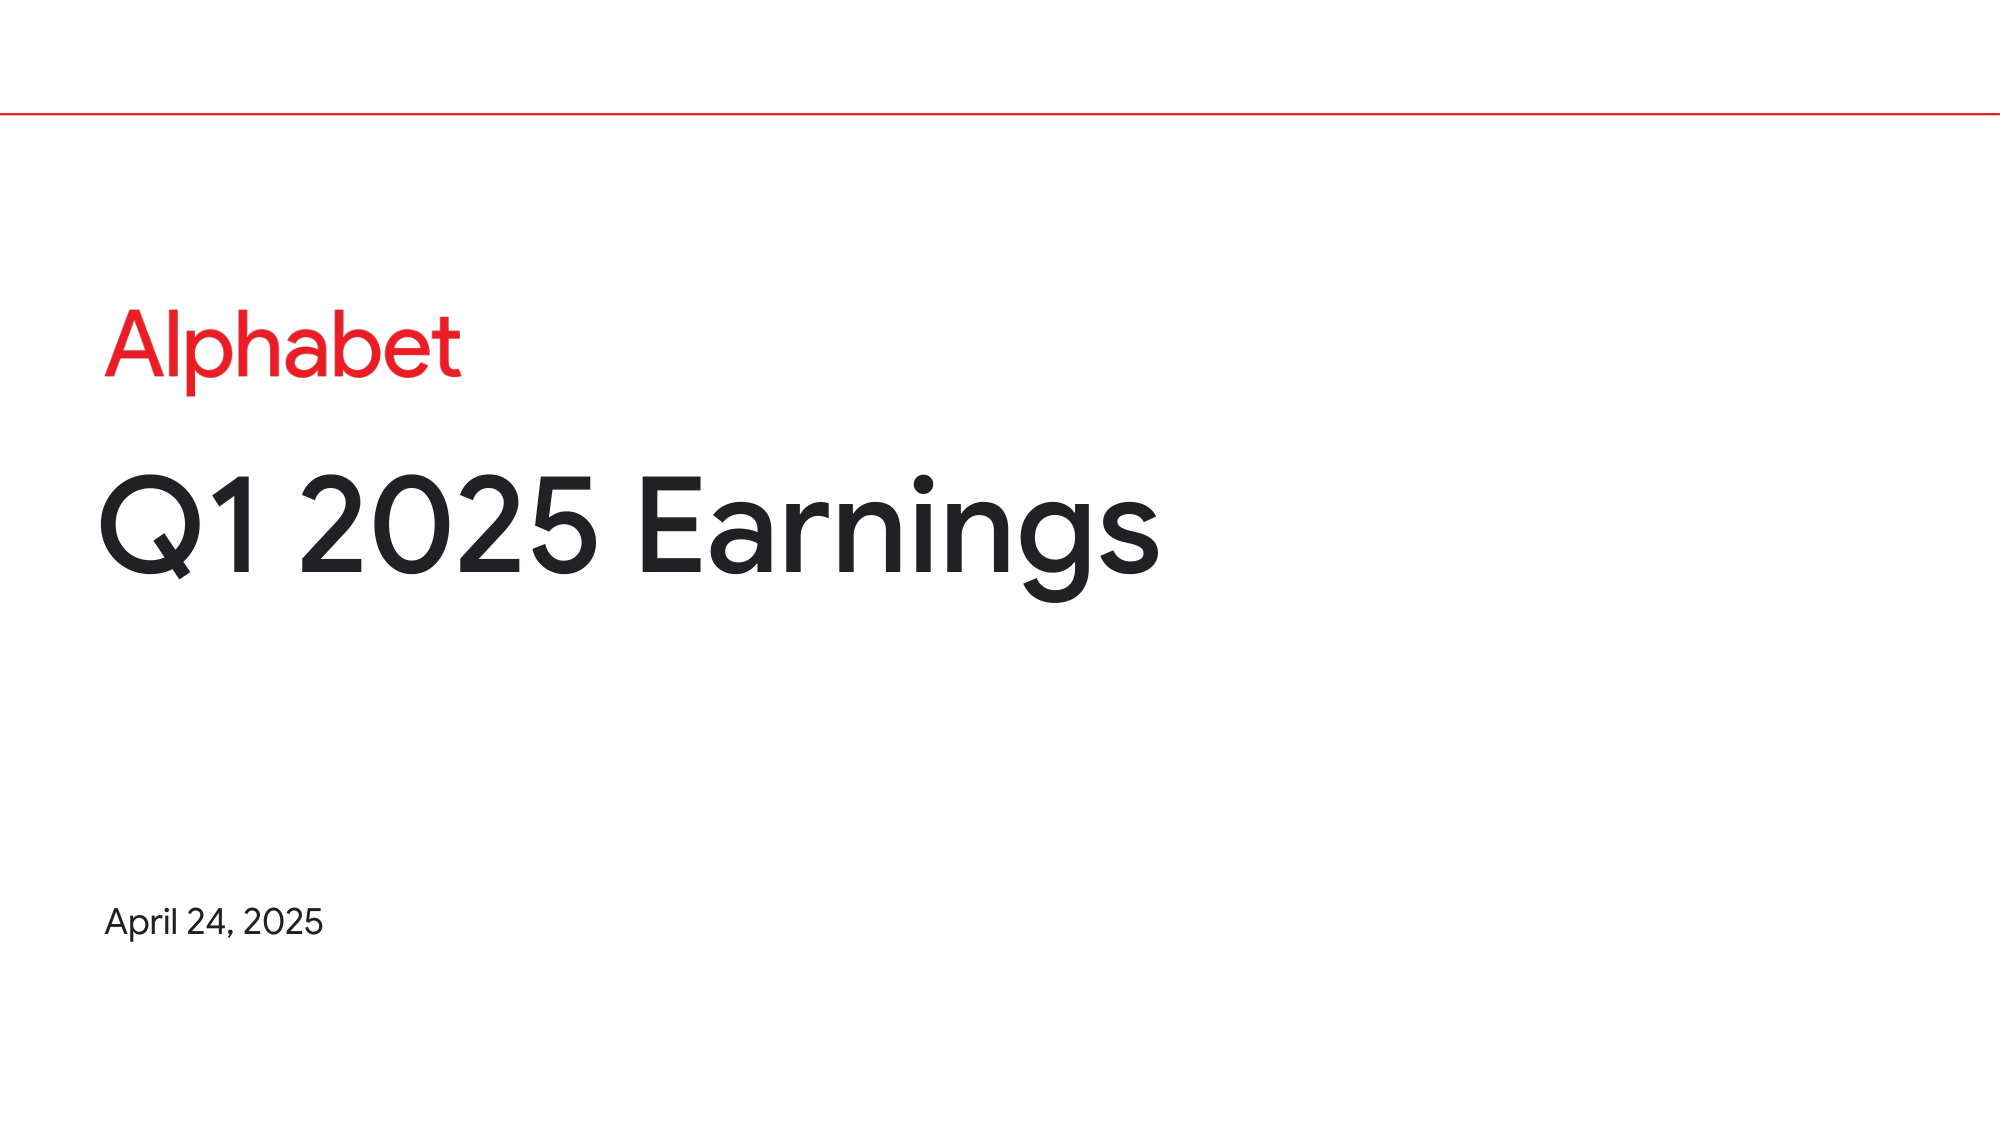


--- Result 2 ---
Caption: Note About Forward-Looking Statements and Al... fr A AR [tna nrninrl AAR ane iernm


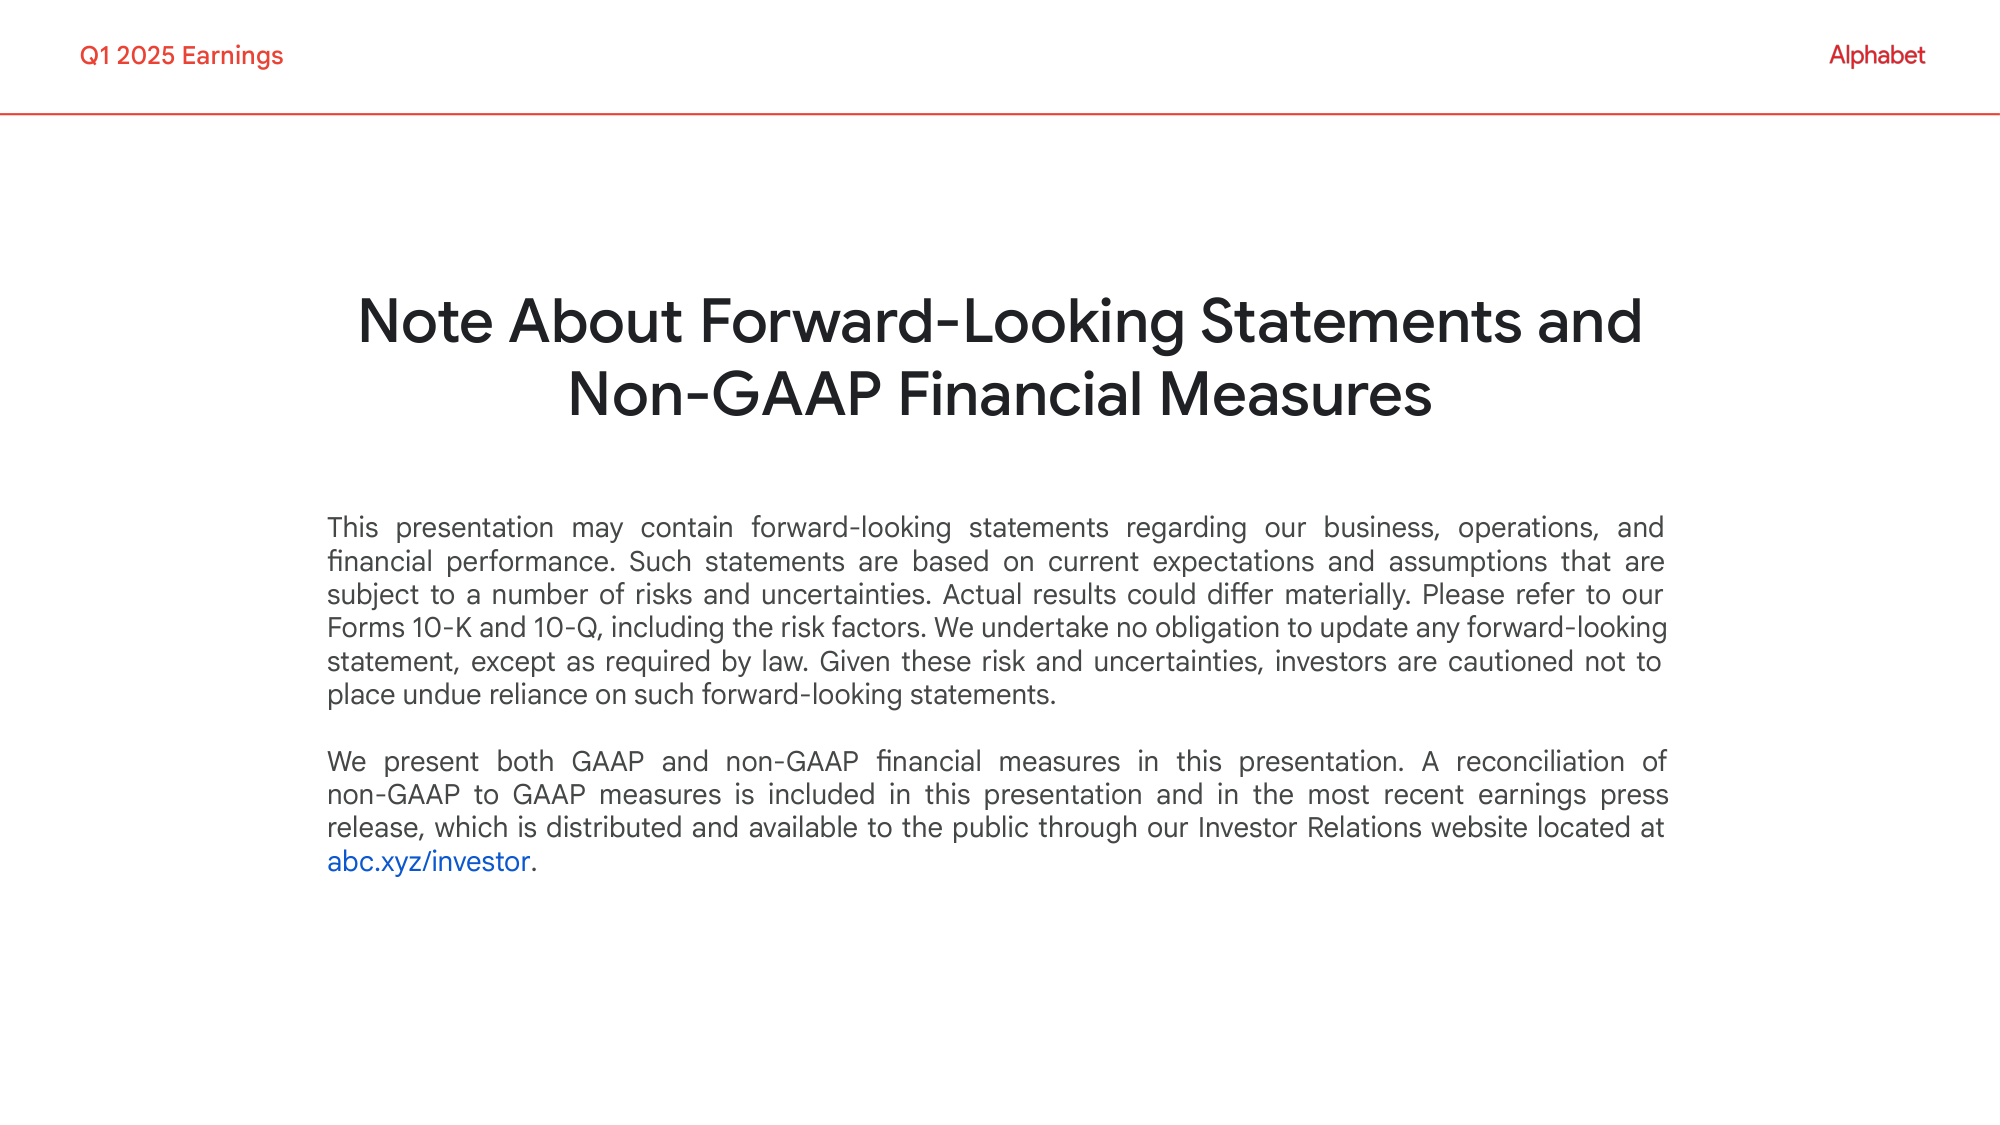


--- Result 3 ---
Caption: Google Services Revenues and Operating Income in Millions, except Percentages; unaudited


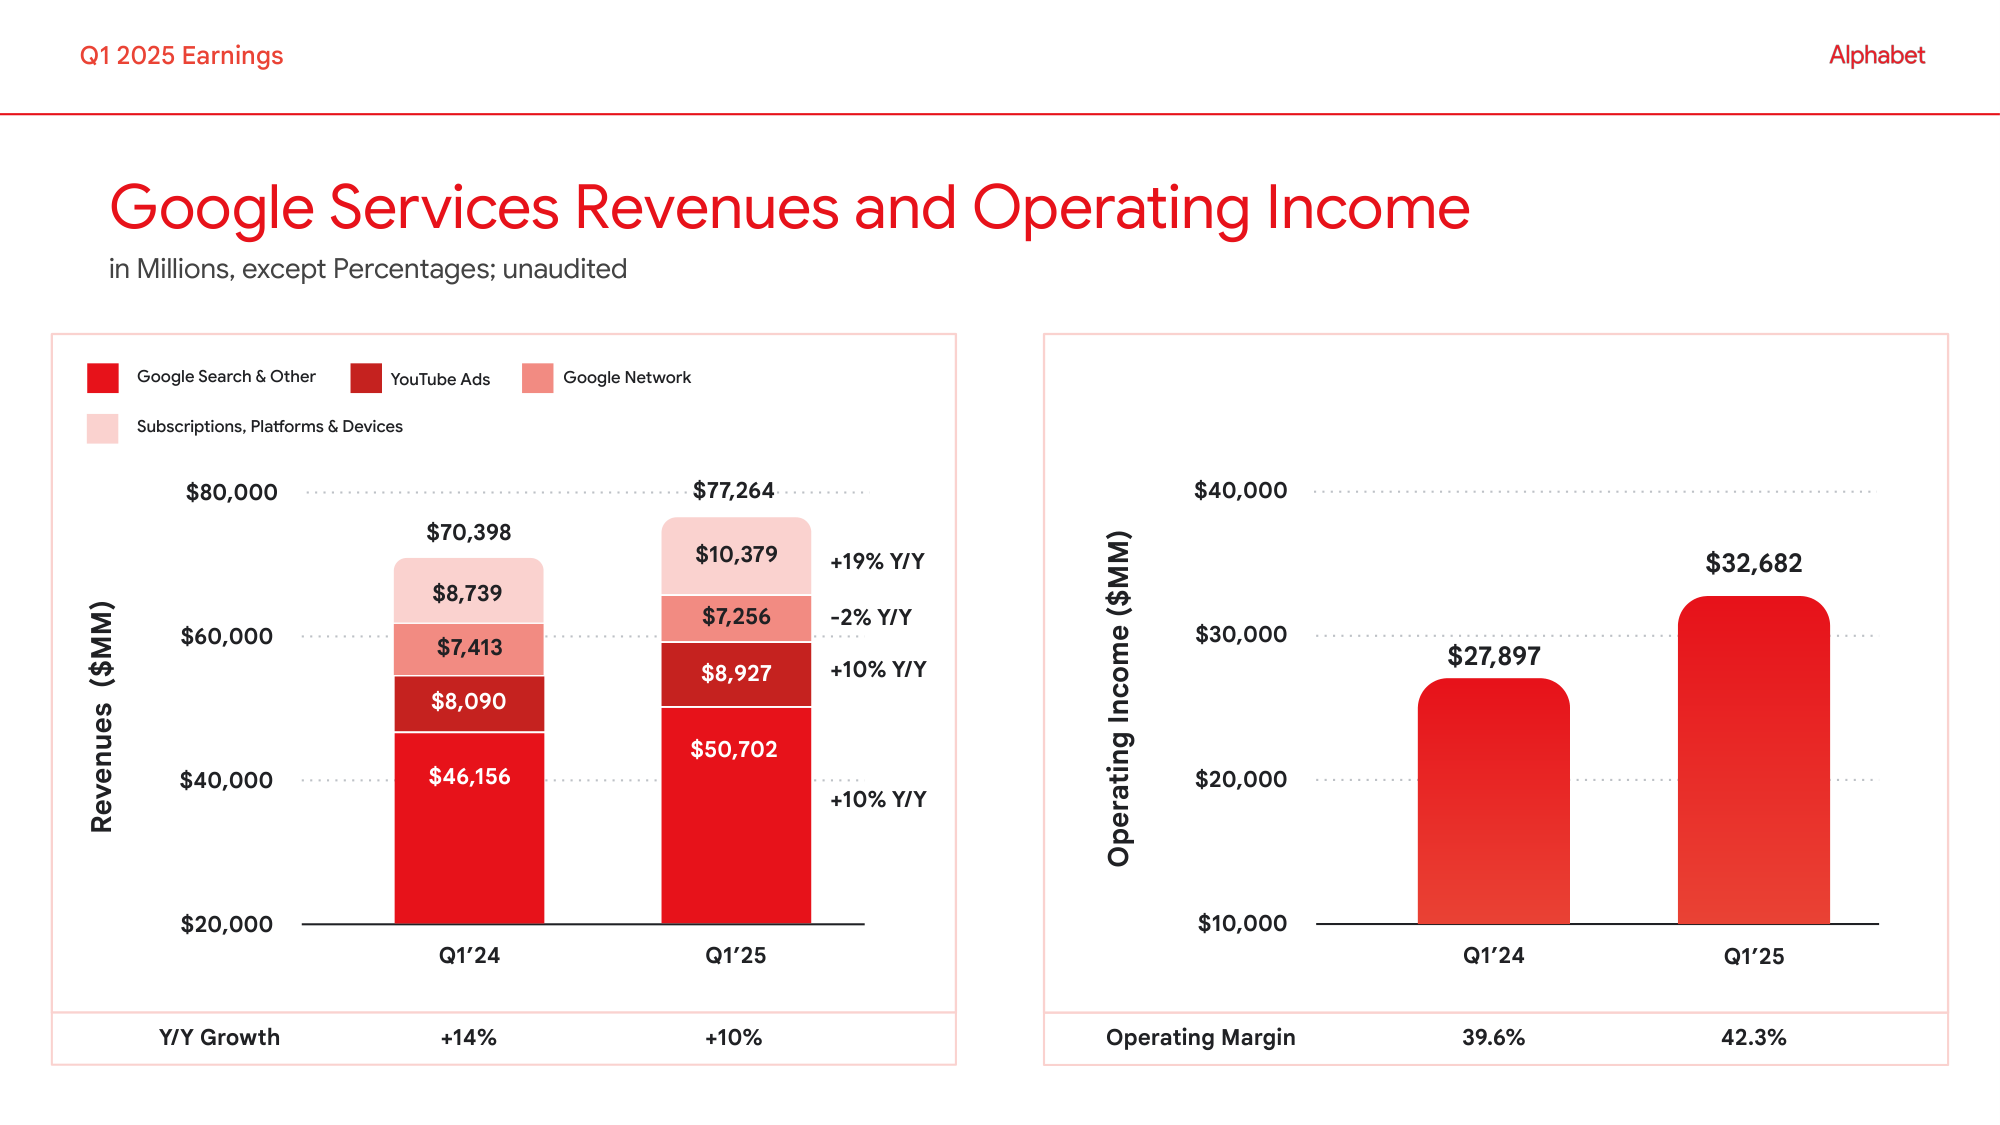

In [ ]:
from IPython.display import Image, display
import os

query = ""
faiss_retriever = faiss_store.as_retriever(search_kwargs={"k": 3})
results = faiss_retriever.invoke(query)

for i, doc in enumerate(results):
    image_path = doc.metadata["image_path"]
    print(f"\n--- Result {i+1} ---")
    print("Caption:", doc.page_content)
    if os.path.exists(image_path):
        display(Image(filename=image_path))
